In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import computational_graph # グラフを出力するパッケージ
from chainer import serializers         # モデルの保存や読込を行うパッケージ

C:\Users\Soto Anno\Downloads\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(resize=0.5, color=True)

In [3]:
df_names_gender_ID = pd.read_csv("names_gender_ID")
df_names_gender_ID

,Unnamed: 0,names,gender,IDnum
0,0,Aaron Eckhart,0,2
1,1,Aaron Guiel,0,3
2,2,Aaron Patterson,0,4
3,3,Aaron Peirsol,0,5
4,4,Aaron Peirsol,0,5
5,5,Aaron Peirsol,0,5
6,6,Aaron Peirsol,0,5
7,7,Aaron Pena,0,6
8,8,Aaron Sorkin,0,7
9,9,Aaron Sorkin,0,7


In [4]:
df_gender_IDnum = pd.read_csv("FaceGender_index_to_gender.csv")
df_gender_IDnum

,number,names,gender,index,Idnum
0,146,AJ Cook,1,2339,0
1,147,AJ Lamas,0,11270,1
2,0,Aaron Eckhart,0,8825,2
3,1,Aaron Guiel,0,2680,3
4,2,Aaron Patterson,0,12745,4
5,3,Aaron Peirsol,0,9870,5
6,4,Aaron Peirsol,0,10235,5
7,5,Aaron Peirsol,0,56,5
8,6,Aaron Peirsol,0,12137,5
9,7,Aaron Pena,0,12396,6


In [5]:
data = lfw_people.images
target = lfw_people.target
target_names = lfw_people.target_names

# testデータのサンプルについて情報を確認する関数
def show_test_sample_info(index):
    img = data[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    
# nは五十音順での名前に対応づけられたID
# 0 ~ 13232であり、この順番でA ~ Z
# 五十音順でn番目の人の写真indexを出力する関数
def img_index(n):
    for i in range(13233):
        if n == target[i]:
            print(i)

In [6]:
data = data.transpose(0, 3, 1, 2)

In [7]:
data = data.astype(np.float32)
data /= 255.

In [8]:
data.shape

(13233, 3, 62, 47)

In [9]:
# genderと、そのindexに値するpicデータを対応づける辞書型の定義
pic_data = []
gender = []
for i in range(len(target)):
    pic_data.append(data[df_gender_IDnum.loc[i,"index"]])
    gender.append(df_gender_IDnum.loc[i,"gender"].astype(np.int32))

In [10]:
gender

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
# trainデータとtestデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pic_data, gender, test_size=0.3, random_state=0)

X_test

[array([[[0.26666668, 0.36078432, 0.32156864, ..., 0.31764707,
          0.2784314 , 0.24705882],
         [0.2901961 , 0.29803923, 0.23137255, ..., 0.29411766,
          0.28235295, 0.23529412],
         [0.2627451 , 0.22745098, 0.16078432, ..., 0.27450982,
          0.2784314 , 0.23529412],
         ...,
         [0.3647059 , 0.34901962, 0.30980393, ..., 0.5921569 ,
          0.54509807, 0.39215687],
         [0.42745098, 0.38039216, 0.34509805, ..., 0.6       ,
          0.58431375, 0.47058824],
         [0.4745098 , 0.40392157, 0.34509805, ..., 0.6039216 ,
          0.6039216 , 0.50980395]],
 
        [[0.22745098, 0.31764707, 0.2784314 , ..., 0.2784314 ,
          0.24705882, 0.21960784],
         [0.2509804 , 0.25490198, 0.1882353 , ..., 0.2509804 ,
          0.2509804 , 0.21176471],
         [0.22745098, 0.1882353 , 0.11764706, ..., 0.23137255,
          0.24313726, 0.21176471],
         ...,
         [0.3372549 , 0.3254902 , 0.28627452, ..., 0.5137255 ,
          0.47843137, 0.

In [12]:
def show_test_sample_info(index):
    # (channel, height, width)を(height, width, channel)に変換
    img = X_test[index].transpose(1,2,0)
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    
    if y_test[index] == 0:
        gender = "Male"
    else:
        gender = "Female"
    # 正解ラベルを出力
    print('gender: ' + gender)

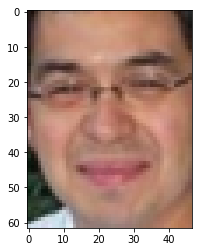

gender: Male


In [13]:
show_test_sample_info(50)

In [14]:
 # 必要なライブラリの読み込み
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import optimizers

In [15]:
# CNNの定義
class CNN(chainer.Chain):
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.conv1 = L.Convolution2D(in_channels=3, out_channels=64, ksize=4, stride=1, pad=2)
            self.bn1 = L.BatchNormalization(64)
            self.conv2 = L.Convolution2D(in_channels=64, out_channels=128, ksize=4, stride=1, pad=2)
            self.bn2 = L.BatchNormalization(128)
            self.conv3 = L.Convolution2D(in_channels=None, out_channels=128, ksize=4, stride=1, pad=2)
            self.bn3 = L.BatchNormalization(128)
            self.fc4 = L.Linear(None, 512)
            self.fc5 = L.Linear(None, 5)
        
        
    def __call__(self, X):
        h = self.bn1(self.conv1(X)) # conv1の出力にBNをかける
        h = F.relu(F.max_pooling_2d(h, ksize=2))
        h = self.bn2(self.conv2(h)) # conv2の出力にBNをかける
        h = F.relu(F.max_pooling_2d(h, ksize=2))
        h = self.bn2(self.conv3(h)) # conv3の出力にBNをかける
        h = F.relu(F.max_pooling_2d(h, ksize=2))
        h = F.dropout(F.relu(self.fc4(h)), ratio=0.5)
        return self.fc5(h)

In [17]:
# 必要なライブラリを読み込み
from chainer.datasets import tuple_dataset
from chainer.training import extensions
from chainer import optimizers, serializers, training, iterators

# 分類器のインスタンスを生成
model = L.Classifier(CNN())

# optimizersの生成
optimizer = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08) # Adamを利用 
optimizer.setup(model)

# ミニバッチに含まれるサンプル数を指定
batchsize = 100

# epoch数を指定
n_epoch = 20

# trainerを定義
train = tuple_dataset.TupleDataset(X_train,y_train)
train_iter = iterators.SerialIterator(train,batch_size=batchsize,shuffle=True)
updater = training.StandardUpdater(train_iter,optimizer)
trainer = training.Trainer(updater,(n_epoch,'epoch'),out = 'result')
# Extensionsを利用してtrainerの機能を拡張
test = tuple_dataset.TupleDataset(X_test,y_test)
test_iter = iterators.SerialIterator(test,batch_size=batchsize,shuffle=False,repeat=False)
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'main/loss', 'validation/main/accuracy', 'validation/main/loss']))
trainer.extend(extensions.ProgressBar())
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy.png'))
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss.png'))

In [18]:
# 学習を実行
trainer.run()

epoch       main/accuracy  main/loss   validation/main/accuracy  validation/main/loss
1           0.720538       1.25414     0.804286                  0.489368              
     total [##................................................]  5.40%
this epoch [###...............................................]  7.96%
       100 iter, 1 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
2           0.802688       0.449455    0.799429                  0.455072              
     total [#####.............................................] 10.80%
this epoch [#######...........................................] 15.91%
       200 iter, 2 epoch / 20 epochs
   0.12221 iters/sec. Estimated time to finish: 3:45:22.898830.
3           0.825435       0.410298    0.817571                  0.415758              
     total [########..........................................] 16.19%
this epoch [###########.......................................] 23.87%
       300 iter, 3 epoch / 20

In [19]:
# ReportPlotによるグラフを出力する関数
from pylab import box
def show_graph(src):
    img =  plt.imread(src)
    xpixels,ypixels = img.shape[0],img.shape[1]
    dpi = 100
    margin = 0.01
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")

    ax.imshow(img, interpolation='none')
    box("off")
    plt.show()

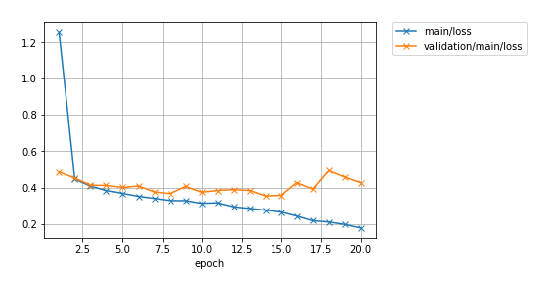

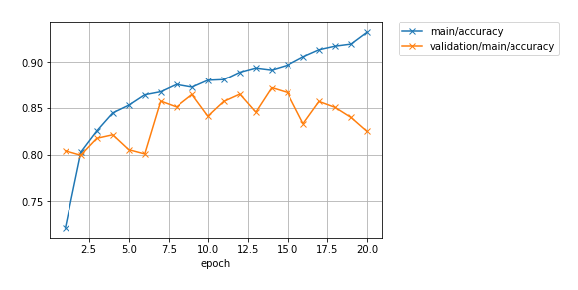

In [20]:
# 誤差と精度のグラフを描画
show_graph('result/loss.png')
show_graph('result/accuracy.png')

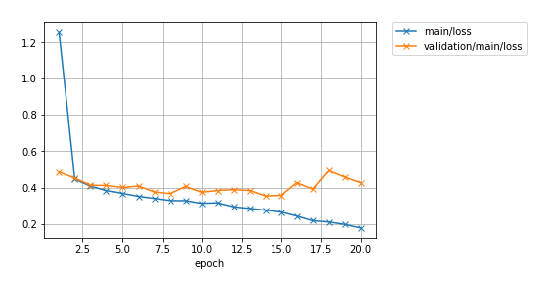

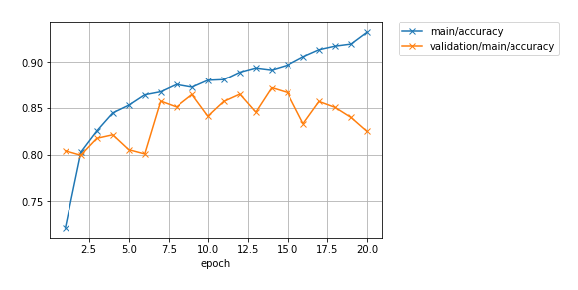

In [21]:
# PlotReportによるグラフを出力する関数
from pylab import box
def show_graph(src):
    img =  plt.imread(src)
    xpixels, ypixels = img.shape[0],img.shape[1]
    dpi = 100
    margin = 0.01
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")

    ax.imshow(img, interpolation='none')
    box("off")
    plt.show()
    
# 精度と誤差をグラフ描画
show_graph('result/loss.png')
show_graph('result/accuracy.png')

In [17]:
# モデルを利用して予測をする関数を定義
def predict(model, X):
    if len(X.shape) == 3:  # データ数が1の場合は、バッチサイズ分の次元を追加
        pred = model.predictor(X[None, ...]).data.argmax()
    else:  # データ数が2以上の場合はそのまま
        pred = model.predictor(X).data.argmax(axis=1)
    return pred

In [18]:
X_test_array = np.array(X_test)
X_test_array

array([[[[0.26666668, 0.36078432, 0.32156864, ..., 0.31764707,
          0.2784314 , 0.24705882],
         [0.2901961 , 0.29803923, 0.23137255, ..., 0.29411766,
          0.28235295, 0.23529412],
         [0.2627451 , 0.22745098, 0.16078432, ..., 0.27450982,
          0.2784314 , 0.23529412],
         ...,
         [0.3647059 , 0.34901962, 0.30980393, ..., 0.5921569 ,
          0.54509807, 0.39215687],
         [0.42745098, 0.38039216, 0.34509805, ..., 0.6       ,
          0.58431375, 0.47058824],
         [0.4745098 , 0.40392157, 0.34509805, ..., 0.6039216 ,
          0.6039216 , 0.50980395]],

        [[0.22745098, 0.31764707, 0.2784314 , ..., 0.2784314 ,
          0.24705882, 0.21960784],
         [0.2509804 , 0.25490198, 0.1882353 , ..., 0.2509804 ,
          0.2509804 , 0.21176471],
         [0.22745098, 0.1882353 , 0.11764706, ..., 0.23137255,
          0.24313726, 0.21176471],
         ...,
         [0.3372549 , 0.3254902 , 0.28627452, ..., 0.5137255 ,
          0.47843137, 0.3

In [19]:
# 性能指標を確認
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, predict(model, X_test_array)))
print('recall: %.3f' % metrics.recall_score(y_test, predict(model, X_test_array), average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, predict(model, X_test_array), average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, predict(model, X_test_array), average='macro'))

accuracy: 0.815
recall: 0.776
precision: 0.735
f1_score: 0.751


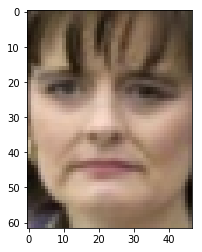

gender: Female
predict: 1
正解です｡


In [20]:
# indexを指定
index = 0

# 画像を出力
show_test_sample_info(index)

# 指定のindexが与えられたtestデータについて確認
pred = predict(model, X_test[index])
print('predict: {}'.format(pred))

# 正解か不正解かを出力
if pred == y_test[index]:
    print('正解です｡')
else:
    print('間違いです｡')

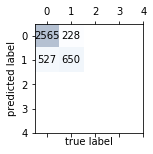

In [21]:
from sklearn.metrics import confusion_matrix as cm

# 混同行列きれいに出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(np.arange(0, 5, 1))                               # x軸の目盛りを指定
    plt.yticks(np.arange(0, 5, 1))  
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    
# 混同行列を出力
result = predict(model, X_test_array)
plot_cm(result, y_test)

In [26]:
# モデルの保存
# (ファイル名, 保存したいモデルの変数名)
serializers.save_npz('FaceGender.model', model)
print('Saved the model.')

Saved the model.


In [16]:
# モデルの読込
# (ファイル名, 読み込みたいモデルに与える変数名)
model = L.Classifier(CNN()) #L.Classifierを投資ているため、この一文が必要
serializers.load_npz('FaceGender.model', model)
print('Loaded the model.')

Loaded the model.
